In [1]:
import pandas as pd
from google.colab import drive
import json
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')

df_train = pd.read_csv("/content/drive/MyDrive/product-recommendation-challenge/train.csv")
df_items = pd.read_csv("/content/drive/MyDrive/product-recommendation-challenge/item_metadata.csv")
with open("/content/drive/MyDrive/product-recommendation-challenge/id_mappings.json", "r") as f:
    id_mappings = json.load(f)

Mounted at /content/drive


In [2]:
item_reverse_map = id_mappings['item_reverse_mapping']
df_train['parent_asin'] = df_train['item_id'].astype(str).map(item_reverse_map)
df = df_train.merge(df_items, how='left', on='parent_asin')

In [3]:
df.drop(columns=['user_id', 'item_id', 'parent_asin'], inplace=True)

In [4]:
df.head(5)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543146 entries, 0 to 2543145
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   rating          float64
 1   timestamp       int64  
 2   main_category   object 
 3   title           object 
 4   average_rating  float64
 5   rating_number   float64
 6   price           float64
 7   store           object 
 8   features        object 
 9   description     object 
 10  images          object 
 11  categories      object 
 12  image_count     int64  
 13  has_images      bool   
 14  image_urls      object 
 15  category        object 
dtypes: bool(1), float64(4), int64(2), object(9)
memory usage: 293.5+ MB


,rating,timestamp,average_rating,rating_number,price,image_count
count,2.543146e+06,2.543146e+06,2.543146e+06,2.458991e+06,2.231477e+06,2.543146e+06
mean,4.038812e+00,1.467106e+12,3.801215e+00,4.801602e+04,1.560992e+00,7.981283e+00
std,1.365664e+00,8.242910e+10,4.242365e-01,1.531134e+05,1.183728e+01,4.317518e+00
min,1.000000e+00,9.565885e+11,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.407054e+12,3.500000e+00,7.070000e+02,0.000000e+00,6.000000e+00
50%,5.000000e+00,1.453042e+12,3.800000e+00,5.192000e+03,0.000000e+00,6.000000e+00
75%,5.000000e+00,1.523213e+12,4.100000e+00,2.632500e+04,0.000000e+00,1.000000e+01
max,5.000000e+00,1.694398e+12,5.000000e+00,1.898759e+06,2.325000e+03,2.880000e+02


In [5]:
df.nunique()

,0
rating,5
timestamp,2530119
main_category,8
title,74827
average_rating,41
rating_number,3606
price,2123
store,33321
features,50877
description,53155


In [6]:
df.isnull().sum()

,0
rating,0
timestamp,0
main_category,820
title,13
average_rating,0
rating_number,84155
price,311669
store,7465
features,0
description,0


In [7]:
from collections import Counter
import re

all_words = " ".join(df['title'].dropna()).lower()
words = re.findall(r'\w+', all_words)
Counter(words).most_common(20)

[('free', 319092),
 ('for', 230625),
 ('the', 185074),
 ('and', 157047),
 ('games', 135198),
 ('game', 125377),
 ('slots', 120597),
 ('tv', 102761),
 ('of', 101239),
 ('word', 101141),
 ('with', 96415),
 ('2', 87276),
 ('casino', 78142),
 ('3', 77839),
 ('s', 71751),
 ('puzzle', 70726),
 ('bingo', 68058),
 ('kindle', 64973),
 ('1', 63472),
 ('old', 60077)]

(np.float64(-0.5), np.float64(799.5), np.float64(479.5), np.float64(-0.5))

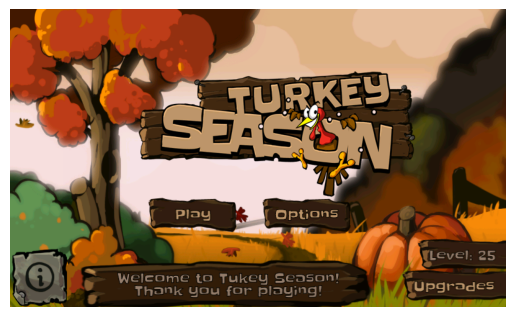

In [8]:
import requests
from PIL import Image
from io import BytesIO

raw = df['image_urls'].dropna().iloc[0]
url = raw.strip("[]").replace("'", "").split(',')[0].strip()
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')

<Axes: xlabel='rating', ylabel='Count'>

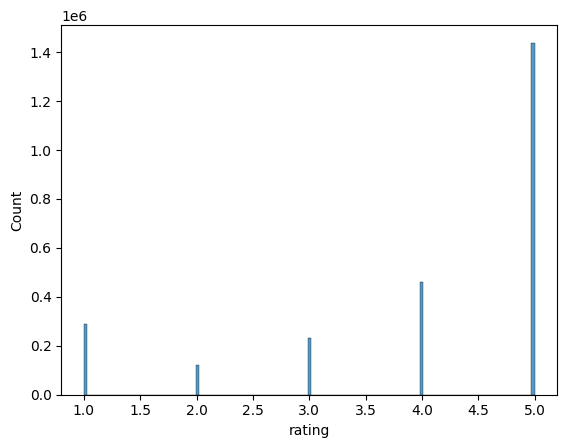

In [9]:
sns.histplot(df["rating"])

<Axes: xlabel='category', ylabel='Count'>

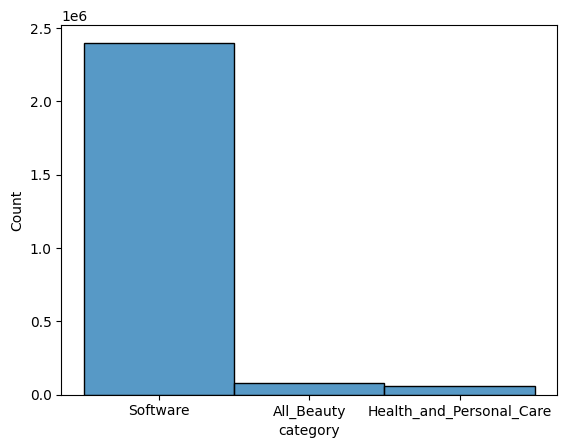

In [10]:
sns.histplot(df["category"])

<Axes: xlabel='main_category', ylabel='Count'>

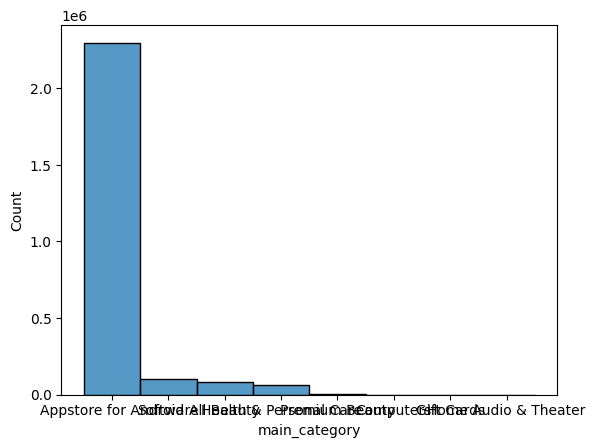

In [11]:
sns.histplot(df['main_category'])

<Axes: xlabel='rating'>

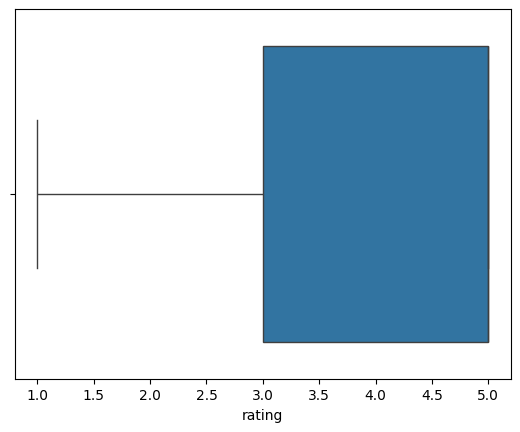

In [12]:
sns.boxplot(x=df["rating"])

<Axes: >

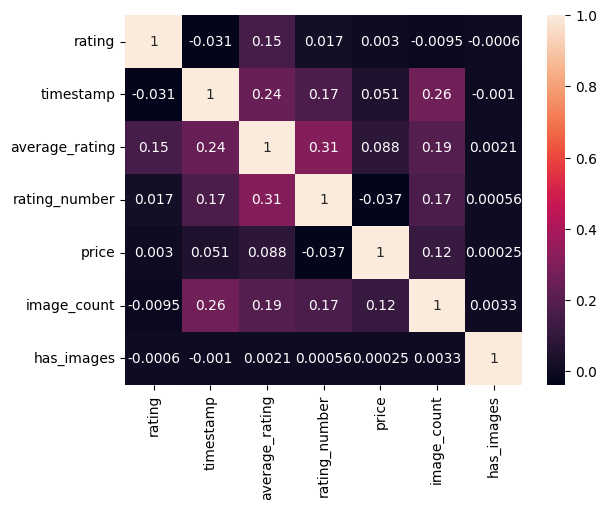

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='price', ylabel='Count'>

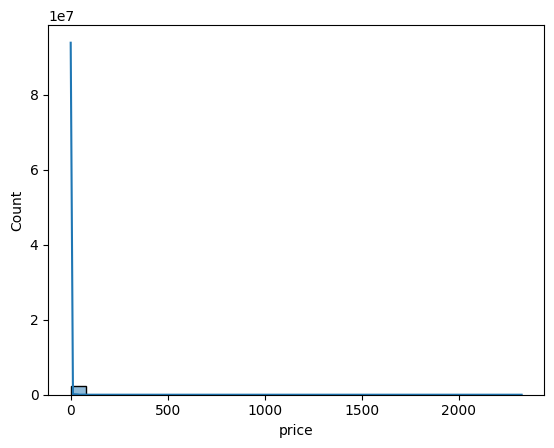

In [14]:
sns.histplot(df['price'].dropna(), bins=30, kde=True)

<Axes: xlabel='has_images', ylabel='count'>

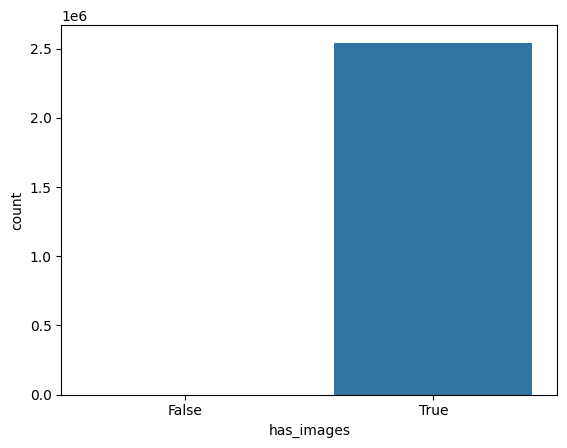

In [15]:
sns.countplot(x=df['has_images'].dropna())